# Part C

The purpose of the third part of the deliverable is to use an SVM classifier in order to classify the data from the datesetCTest.csv file.

To do so we firstly load the data from the csv file and separate it into train and test data in the same way as in the previous parts.

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None)
data = data.values 

#printing the data
print(data)

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


We then import the 'scikit-learn' library that contains the SVM linear classifier and the 'time' library in order to be able to calculate the time our classifier needs to train the model and make predictions on the data.

In [84]:
from sklearn import svm
import time

linear_classifier = svm.SVC(kernel= 'linear')
start_time = time.time()

We fit our data to the classifier we have defined.

In [85]:
linear_classifier.fit(X_train, y_train)
end_time = time.time()
print(f'the training time is: {end_time - start_time} seconds')

We instruct the classifier to generate predictions, measuring the time it takes for the process and computing the accuracy of the classifier on the training data.

In [86]:
from sklearn.metrics import accuracy_score

start_time = time.time()
x_train_prediction = linear_classifier.predict(X_train)
end_time = time.time()

training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print(f'Prediction time for train images: {end_time - start_time} seconds')

training_data_ac = accuracy_score(y_train, x_train_prediction)
print(f'The accuracy score on training data is: {training_data_ac}')

In the same way we calculate the accuracy of the classifier in the testing data.

In [87]:
start_time = time.time()
x_test_prediction = linear_classifier.predict(X_test)
end_time = time.time()

testing_data_accuracy = accuracy_score(y_test, x_test_prediction)
print(f'Prediction time for test images: {end_time - start_time} seconds')

testing_data_ac = accuracy_score(y_test, x_test_prediction)
print(f'The accuracy score on testing data is: {testing_data_ac}')

We define the function to represent our data in 2D format, where the shape defines the class to which each line belongs. In addition, we depict all 3 regions resulting from the classifier with the lines separating the classes from each other.

In [88]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

def plot_func(x, y, clf ):
   
    plt.style.use('_mpl-gallery')
   
    fig, ax = plt.subplots(figsize=(8, 6)) 

    # Ploting the decision boundaries and margins with a specific figure size
    plot_decision_regions(x, y.astype(np.int_), clf, legend=2, ax=ax)

    # Add labels and legend
    ax.set_xlabel('X-axis label')
    ax.set_ylabel('Y-axis label')
    ax.legend()

    # Show the plot
    plt.show()

We call the plot_func function on our training data and plot our graph.

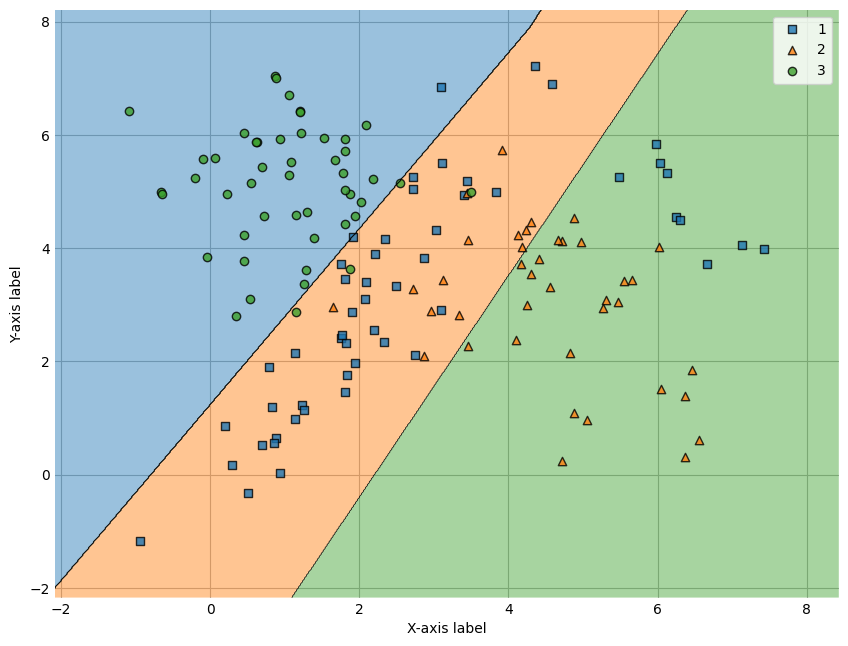

In [97]:
plot_func(X_train, y_train, linear_classifier)

From the diagram above, we notice that the classifier has managed to classify most of our training elements into the correct class, while the classes that have the wrong representations are located in the areas near the decision vectors. Furthermore, we notice that the classifier has managed to define the correct decision vectors.

We call the plot_func function on our testing data and plot our graph.

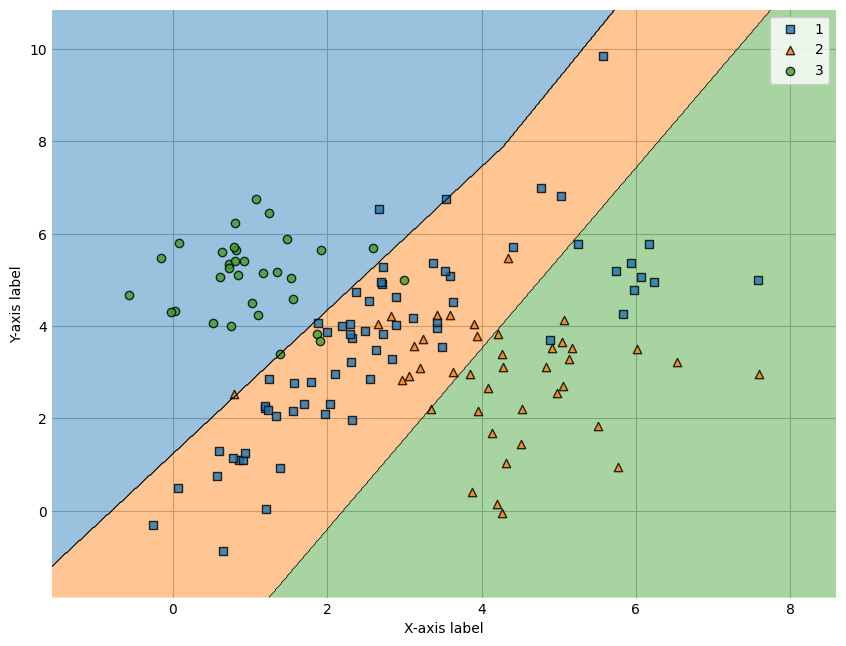

In [90]:
plot_func(X_test, y_test, linear_classifier)

Add commentary

## SVM Classifier with RBF kernel  

After we have already loaded our data we start to define the various values of the hyperparameters C (cost parameter that adjusts the trade-off between the accuracy in the data and the simplicity of the model) and gamma (kernel density parameter) that we want to experiment with. We choose the values [0.001, 0.01, 0.1, 1, 10, 100, 1000 ] that we think help to get a good picture of our classifier. We save our data in a new text file.

In [93]:
C = {0.001, 0.01, 0.1, 1, 10, 100, 1000}
gamma = {0.001, 0.01, 0.1, 1, 10, 100}

We define the train_and_evaluate_classifier function which is responsible for training and evaluating our classifier in a similar way as we did previously in the linear classifier.

In [94]:
def train_and_evaluate_classifier(clf, train_images, train_labels, test_images, test_labels, i, gamma):
    print(f'{clf.__class__.__name__} Linear Classification results for C = {i} and gamma = {gamma}')
    
    # Training
    start_time = time.time()
    clf.fit(train_images, train_labels)
    end_time = time.time()
    print(f'Training time: {end_time - start_time} seconds')

    # Prediction on training images
    start_time = time.time()
    train_images_prediction = clf.predict(train_images)
    end_time = time.time()
    print(f'Prediction time for train images: {end_time - start_time} seconds')
    training_data_ac = accuracy_score(train_labels, train_images_prediction)
    print(f'The accuracy score on training data is: {training_data_ac}')

    # Prediction on test images
    start_time = time.time()
    test_images_prediction = clf.predict(test_images)
    end_time = time.time()
    print(f'Prediction time for test images: {end_time - start_time} seconds')
    testing_data_ac = accuracy_score(test_labels, test_images_prediction)
    print(f'The accuracy score on testing data is: {testing_data_ac}')


We then call our classifier for the various values of C and gamma and we save our results in the test file we have created.

In [95]:
from sklearn.svm import SVC
import sys

# Redirect stdout to a file
output_file = "svm_results.txt"
with open(output_file, 'w') as f:
    sys.stdout = f  # Redirect stdout to the file

    for g in gamma:
        for i in C:
            classifier = SVC(kernel='rbf', C=i, gamma=g)
            train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test, i, g)

    sys.stdout = sys.__stdout__  # Reset stdout to its original value

We extract our data into a txt file and open them in order to perform further investigation. For each of the line we extract the data we are interested to such as the training accuracy, testing accuracy, training, testing and prediction time.  

In [98]:
# Read data from the file
with open('svm_results.txt', 'r') as file:
    data = file.readlines()

# Initialize lists to store extracted data
C_values, gamma_values, accuracy_train, accuracy_test, training_time, prediction_time_train, prediction_time_test  = [], [], [], [], [], [], []

# Extract data from each line
for line in data:
    if "SVC Linear Classification results" in line:
        # Extract C and gamma values
        C, gamma = map(float, line.split("for C = ")[1].split(" and gamma = ")[0:2])
        C_values.append(C)
        gamma_values.append(gamma)

    # Extract accuracy values
    if "The accuracy score on training data is:" in line:
        accuracy_train.append(float(line.split(":")[1]))

    if "The accuracy score on testing data is:" in line:
        accuracy_test.append(float(line.split(":")[1]))
   
    if "Training time:" in line:
        training_time.append(float(line.split(":")[1].split(" seconds")[0]))

    if "Prediction time for train images:" in line:
        prediction_time_train.append(float(line.split(":")[1].split(" seconds")[0]))

    if "Prediction time for test images:" in line:
        prediction_time_test.append(float(line.split(":")[1].split(" seconds")[0]))


We then convert our lists intto numpy arrays to help us better manipulate them and define a color map for discrete gamma values.

In [100]:

C_values = np.array(C_values)
gamma_values = np.array(gamma_values)
accuracy_train = np.array(accuracy_train)
accuracy_test = np.array(accuracy_test)
training_time = np.array(training_time)
prediction_time_train = np.array(prediction_time_train)
prediction_time_test = np.array(prediction_time_test)


gamma_colors = {0.001: 'red', 0.01: 'green', 0.1: 'blue', 1: 'purple', 10: 'orange', 100: 'brown'}
# Get unique gamma values
unique_gamma_values = np.unique(gamma_values)

Comment

In [106]:
def ploting_func(unique_gamma_values, C_values, accuracy, gamma_colors, type, string_type):
# Plotting Training Data Accuracy
    plt.figure(figsize=(12, 6))
    for gamma in unique_gamma_values:
        # Filter data for each gamma value
        mask = (gamma_values == gamma)
        sorted_indices = np.argsort(C_values[mask])
        plt.plot(C_values[mask][sorted_indices], accuracy[mask][sorted_indices],
                'o-', label=f'{type} {string_type} (Gamma={gamma})', color=gamma_colors[gamma])

    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel(f'{string_type}')
    plt.xscale('log')  # Logarithmic scale for better visualization
    plt.title(f'SVM with rbf kernel Classification {type} {string_type}')
    plt.legend()
    plt.show()


Comment

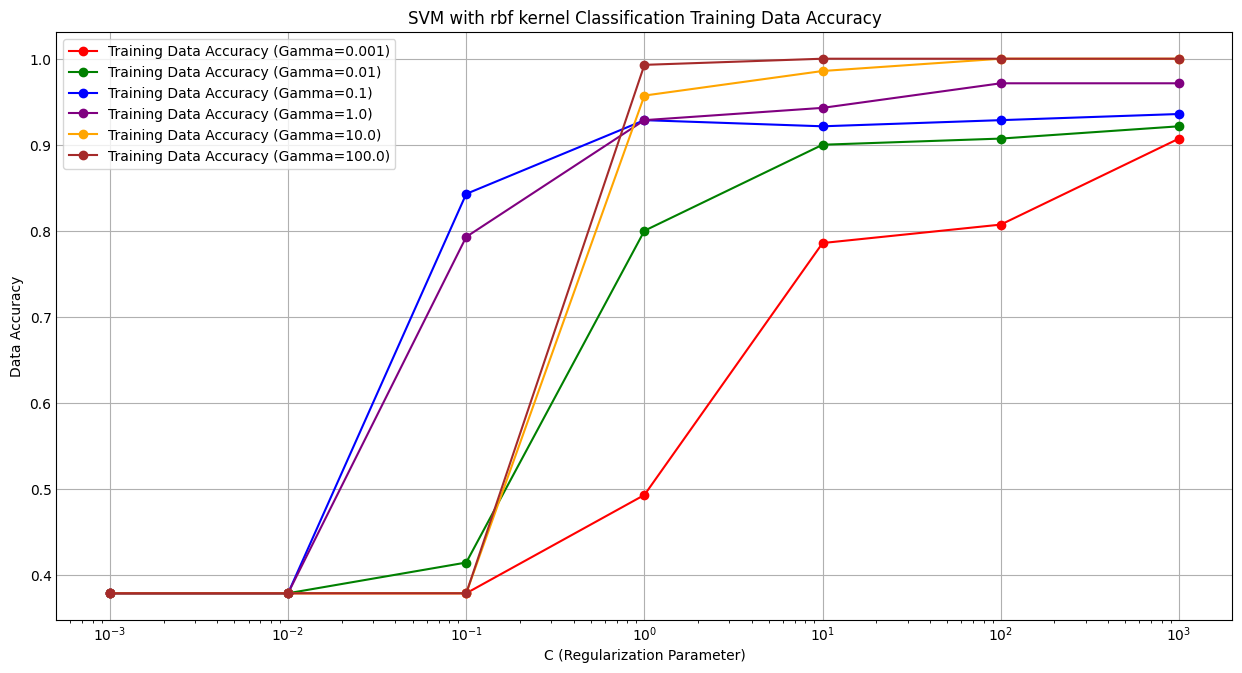

In [110]:
ploting_func(unique_gamma_values, C_values, accuracy_train, gamma_colors, 'Training', 'Data Accuracy')

Comment

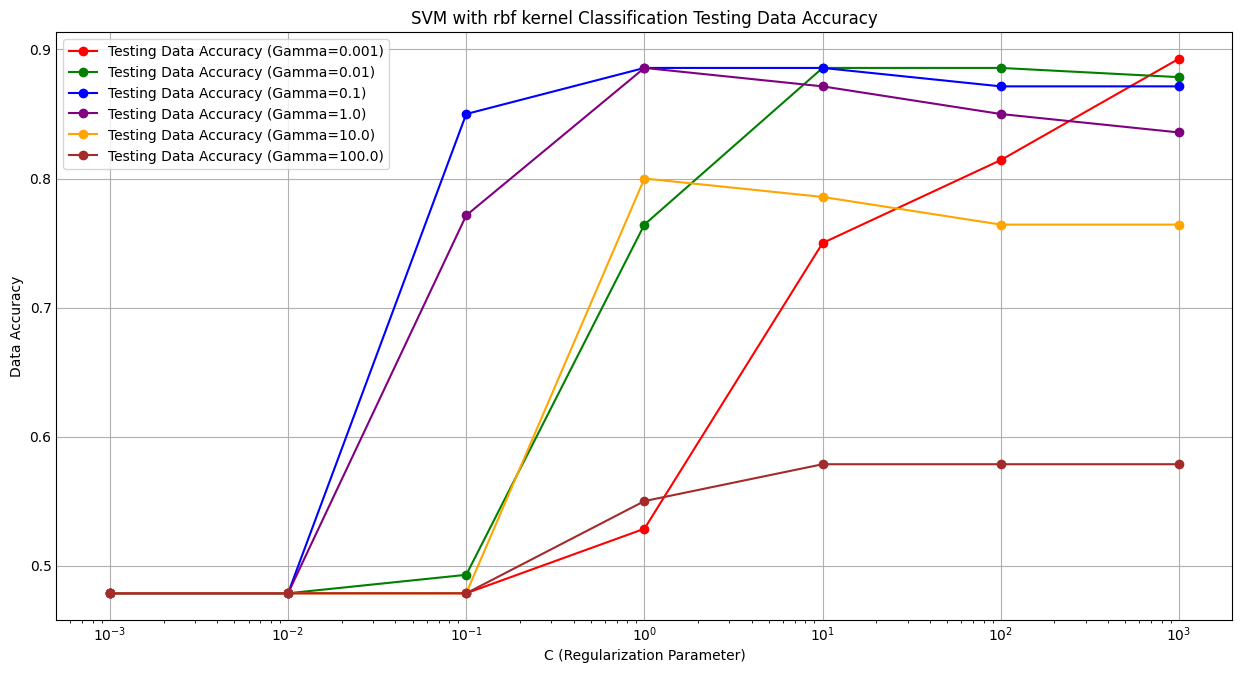

In [111]:
ploting_func(unique_gamma_values, C_values, accuracy_test, gamma_colors, 'Testing', 'Data Accuracy')

Comment

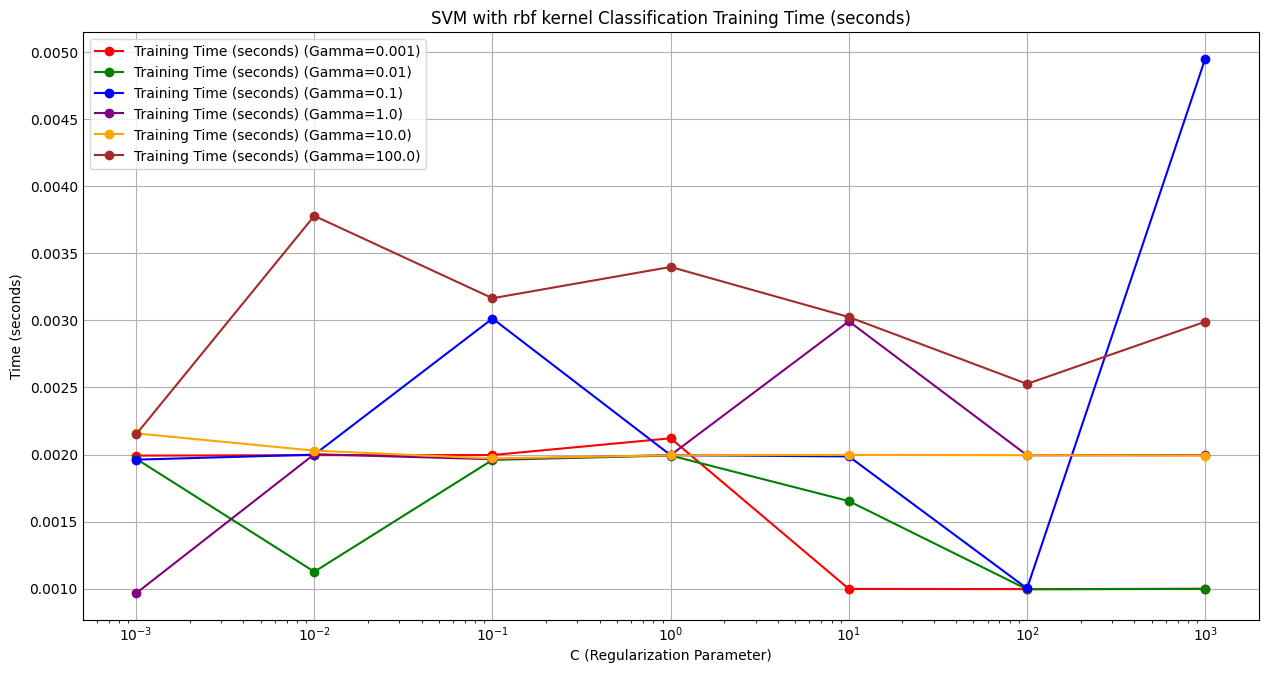

In [112]:
ploting_func(unique_gamma_values, C_values, training_time, gamma_colors, 'Training', 'Time (seconds)')

Comment

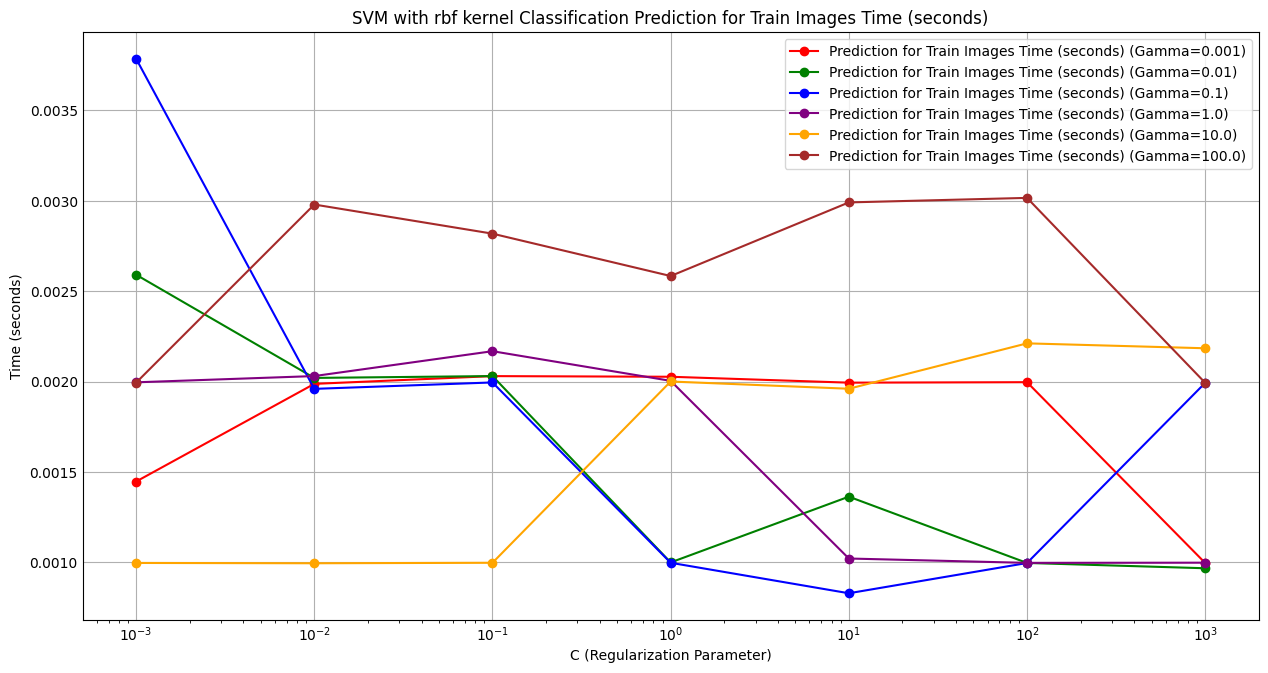

In [113]:
ploting_func(unique_gamma_values, C_values, prediction_time_train, gamma_colors, 'Prediction for Train Images', 'Time (seconds)')

Comment

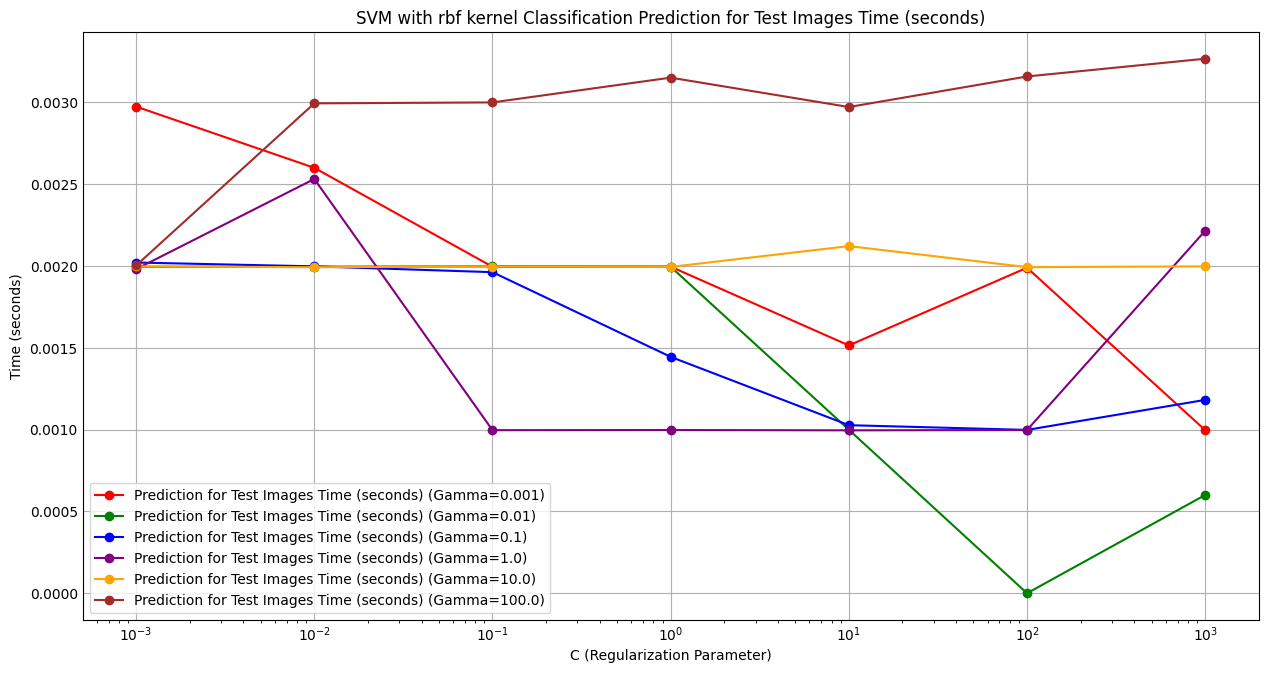

In [114]:
ploting_func(unique_gamma_values, C_values, prediction_time_test, gamma_colors, 'Prediction for Test Images', 'Time (seconds)')

Comment